# Support Vector Machines

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [3]:
iris = load_iris()
X = iris["data"][:, [2, 3]]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)
svm_clf = Pipeline([("scaler", StandardScaler()), 
                    ("linear_svc", LinearSVC(C=1, loss="hinge"))])
svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [4]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

Example of meshgrid usage:

In [5]:
x0 = np.linspace(1, 5, 5)
x1 = np.linspace(11, 20, 10)
print("x0: ", x0, "\nx1: ", x1)
xx1, xx2 = np.meshgrid(x0, x1)
print("xx1:\n", xx1, "\nxx2:\n", xx2)
print("xx1.ravel():\n", xx1.ravel(), "xx2.ravel():\n", xx2.ravel())
X_grid = np.c_[xx1.ravel(), xx2.ravel()]
print("X_grid:\n", X_grid)
print("X_grid reshaped:\n", X_grid.reshape((5, 10, -1)))

x0:  [1. 2. 3. 4. 5.] 
x1:  [11. 12. 13. 14. 15. 16. 17. 18. 19. 20.]
xx1:
 [[1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]] 
xx2:
 [[11. 11. 11. 11. 11.]
 [12. 12. 12. 12. 12.]
 [13. 13. 13. 13. 13.]
 [14. 14. 14. 14. 14.]
 [15. 15. 15. 15. 15.]
 [16. 16. 16. 16. 16.]
 [17. 17. 17. 17. 17.]
 [18. 18. 18. 18. 18.]
 [19. 19. 19. 19. 19.]
 [20. 20. 20. 20. 20.]]
xx1.ravel():
 [1. 2. 3. 4. 5. 1. 2. 3. 4. 5. 1. 2. 3. 4. 5. 1. 2. 3. 4. 5. 1. 2. 3. 4.
 5. 1. 2. 3. 4. 5. 1. 2. 3. 4. 5. 1. 2. 3. 4. 5. 1. 2. 3. 4. 5. 1. 2. 3.
 4. 5.] xx2.ravel():
 [11. 11. 11. 11. 11. 12. 12. 12. 12. 12. 13. 13. 13. 13. 13. 14. 14. 14.
 14. 14. 15. 15. 15. 15. 15. 16. 16. 16. 16. 16. 17. 17. 17. 17. 17. 18.
 18. 18. 18. 18. 19. 19. 19. 19. 19. 20. 20. 20. 20. 20.]
X_grid:
 [[ 1. 11.]
 [ 2. 11.]
 [ 3. 11.]
 [ 4. 11.]
 [ 5. 11.]
 [ 1. 12.]
 [ 2. 12.]
 [ 3. 12.]
 [ 4. 12.]
 [ 5. 12.]


In [6]:
a = np.array([1, 2, 3])
b = np.array([5, 6, 7])
print("np.hstack: ", np.hstack((a, b)))
print("np.c_:\n", np.c_[a, b])

np.hstack:  [1 2 3 5 6 7]
np.c_:
 [[1 5]
 [2 6]
 [3 7]]


In [7]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel(r"$x_1$", fontsize=15)
    plt.ylabel(r"$x_2$", fontsize=15, rotation=0)

In [8]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    xx0, xx1 = np.meshgrid(x0s, x1s)
    X = np.c_[xx0.ravel(), xx1.ravel()]
    y_pred = clf.predict(X).reshape(xx0.shape)
    y_decision = clf.decision_function(X).reshape(xx0.shape)
    plt.contourf(xx0, xx1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(xx0, xx1, y_decision, cmap=plt.cm.brg, alpha=0.2)

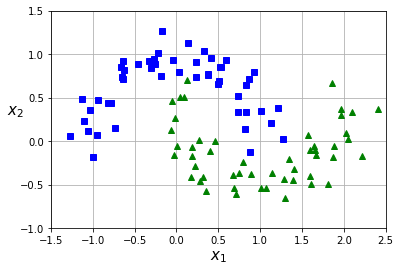

In [9]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

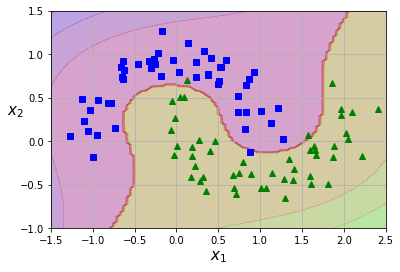

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly_svm_clf = Pipeline([("poly_features", PolynomialFeatures(degree=3)), 
                         ("scaler", StandardScaler()), 
                         ("svm_clf", LinearSVC(C=10, loss="hinge"))])
poly_svm_clf.fit(X, y)
plot_predictions(poly_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

## Polynomial Kernel

In [11]:
axes = [-1.5, 2.5, -1, 1.5]

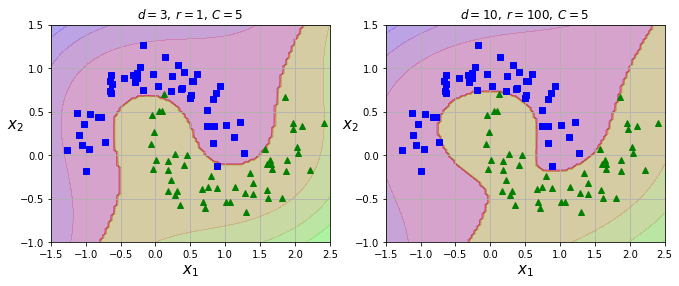

In [12]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([("scaler", StandardScaler()), 
                                ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))])
poly_kernel_svm_clf.fit(X, y)
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, axes)
plot_dataset(X, y, axes)
plt.title(r"$d=3,\:r=1,\:C=5$")

poly_kernel_svm_clf = Pipeline([("scaler", StandardScaler()), 
                                ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))])
poly_kernel_svm_clf.fit(X, y)
plt.subplot(122)
plot_predictions(poly_kernel_svm_clf, axes)
plot_dataset(X, y, axes)
plt.title(r"$d=10,\:r=100,\:C=5$");

In [13]:
poly_kernel_svm_clf.decision_function([[1.3, -0.3]])

array([8.11330959])

## Gaussian RBF (Radial Basis Function) Kernel

Gaussian RBF:

$\phi_\gamma(\mathbf{x}, \mathbf{\ell})= \text{exp}\lgroup-\gamma\|\mathbf{x}-\ell\|^2\rgroup$

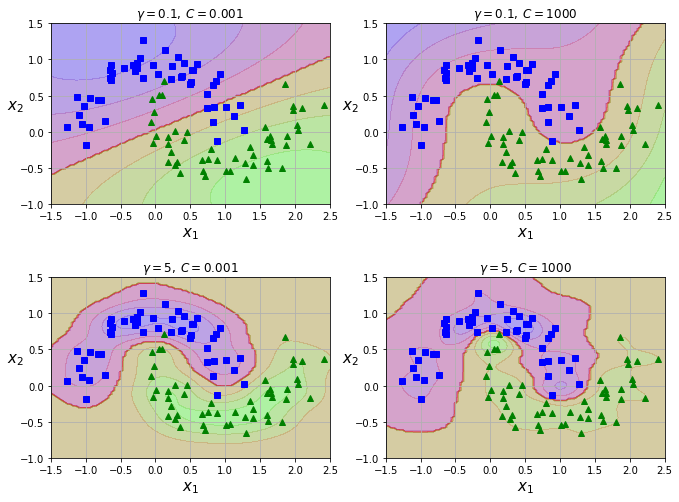

In [14]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000

svm_clfs = []

for gamma in (gamma1, gamma2):
    for C in (C1, C2):
        rbf_kernel = Pipeline([("scaler", StandardScaler()), 
                               ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))])
        rbf_kernel.fit(X, y)
        svm_clfs.append(rbf_kernel)

fig = plt.figure(figsize=(11, 8))
fig.subplots_adjust(hspace=0.4)

for i, model in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_dataset(X, y, axes)
    plot_predictions(model, axes)
    plt.title(r"$\gamma={},\:C={}$".format(model.named_steps["svm_clf"].gamma, 
                                           model.named_steps["svm_clf"].C))

## SVM Under the Hood

Prediction of Linear classirier SVM:

$\hat{y}=\left\{\begin{array}{lr}
0,\:\text{if}\:\mathbf{w}^T\cdot\mathbf{x}+b < 0,\\
1,\:\text{if}\:\mathbf{w}^T\cdot\mathbf{x}+b\geq0\\
\end{array}\right.$

### Contraint Optimisation (Primal Rroblem)

__Target of learning _(harg margin classification)_:__

- $t^{(i)} = -1$ if $y^{(i)}=0$
- $t^{(i)} = \phantom{-}1$ if $y^{(i)}=1$

Target:

$\underset{\mathbf{w},\:b}{\text{minimise }}\dfrac{1}{2}\mathbf{w}^T\mathbf{w}$

with condition $t^{(i)}(\mathbf{w}^T\cdot\mathbf{x}^{(i)}+b)\geq1$ for $ i=1, 2, \ldots, m$

__Target of learning _(soft margin classification)_:__

Target:

$\underset{\mathbf{w},\:b,\:\zeta}{\text{minimise }}\dfrac{1}{2}\mathbf{w}^T\mathbf{w}
+C\sum\limits_{i=1}^{m}\zeta^{(i)}$

with condition $t^{(i)}(\mathbf{w}^T\cdot\mathbf{x}^{(i)}+b)\geq1-\zeta^{(i)}$ and $\zeta^{(i)}\geq0$ for $ i=1, 2, \ldots, m$

To solve such tasks it is possible to use **Quadratic Programming (QP)** solvers

### Dual Problem

$\underset{\alpha}{\text{minimise }}\dfrac{1}{2}\sum\limits_{i=1}^m\sum\limits_{j=1}^m\alpha^{(i)}\alpha^{(j)}t^{(i)}t^{(j)}{\mathbf{x}^{(i)}}^T\mathbf{x}^{(j)}-\sum\limits_{i=1}^m\alpha^{(i)}$

with condition $\alpha^{(i)}\geq0$ for $i=1, 2, \ldots, m$

After $\hat{\alpha}$ that minimises the equation abowe is found, it's possible to solve a primal problem:

$\mathbf{\hat{w}}=\sum\limits_{i=1}^{m}\hat{\alpha}^{(i)}t^{(i)}\mathbf{x}^{(i)}$

$\hat{b}=\dfrac{1}{n_s}\underset{\hat{\alpha}^{(i)}>0}{\sum\limits_{i=1}^m}\lgroup t^{(i)}-\hat{\mathbf{w}}^T\cdot\mathbf{x}^{(i)}\rgroup$

### Kernel Trick

$\phi(\mathbf{x})=\phi\left\lgroup\left\lgroup\begin{array}{c}x_1\\x_2\end{array}\right\rgroup\right\rgroup=\left\lgroup\begin{array}{c}x_1^2\\\sqrt{2}x_1x_2\\x_2^2\end{array}\right\rgroup$

For polinomial transformation with power = 2

$\phi(\mathbf{a})^T\cdot\phi(\mathbf{b})=\left\lgroup\begin{array}{c}
a_1^2\\
\sqrt{2}a_1a_2\\
a_2^2\end{array}\right\rgroup^T\cdot\left\lgroup\begin{array}{c}
b_1^2\\
\sqrt{2}b_1b_2\\
b_2^2\end{array}\right\rgroup=a_1^2b_1^2+2a_1b_1a_2b_2+a_2^2b_2^2=(a_1b_1+a_2b_2)^2=\left\lgroup
\left\lgroup\begin{array}{c}
a_1\\
a_2
\end{array}\right\rgroup^T\cdot
\left\lgroup\begin{array}{c}
b_1\\
b_2
\end{array}\right\rgroup
\right\rgroup^2=\left(\mathbf{a}^T\cdot\mathbf{b}\right)^2$

$\phi(\mathbf{a})^T\cdot\phi(\mathbf{b})=\left(\mathbf{a}^T\cdot\mathbf{b}\right)^2$

__Most common kernels:__

- Linear:&emsp;$K(\mathbf{a}, \mathbf{b})=\mathbf{a}^T\cdot\mathbf{b}$
- Polinomial:&emsp;$K(\mathbf{a}, \mathbf{b})=\left(\gamma\mathbf{a}^T\cdot\mathbf{b}+r\right)^d$
- Gaussian RBF:&emsp;$K(\mathbf{a}, \mathbf{b})=\text{exp}\left(-\gamma\|\mathbf{a} - \mathbf{b}\|^2\right)$
- Sigmoid:&emsp;$K(\mathbf{a}, \mathbf{b})=\tanh\left(\gamma\mathbf{a}^T\cdot\mathbf{b}+r\right)$

### Making predictions by using a parametrically reduced SVM method

$\begin{split}
h_{\hat{\mathbf{W}},\:\hat{b}}\left(\phi\left(\mathbf{x}^{(n)}\right)\right) &=\hat{\mathbf{W}}^T\cdot\phi\left(\mathbf{x}^{(n)}\right)+\hat{b}=\left(\sum\limits_{i=1}^{m}\hat{\alpha}^{(i)}t^{(i)}\phi\left(\mathbf{x}^{(i)}\right)\right)^T\cdot\phi\left(\mathbf{x}^{(n)}\right)+\hat{b}\\
&=\sum\limits_{i=1}^m\hat{\alpha}^{(i)}t^{(i)}\left(\phi\left(\mathbf{x}^{(i)}\right)^T\cdot\phi\left(\mathbf{x}^{(n)}\right)\right)+\hat{b}\\
&=\underset{\hat{\alpha}^{(i)}>0}{\sum\limits_{i=1}^m}\hat{\alpha}^{(i)}t^{(i)}K\left(\mathbf{x}^{(i)},\:\mathbf{x}^{(n)}\right)+\hat{b}
\end{split}$

$\alpha^{(i)}\neq0$ only for __support vectors__ - it means we need to multiply $\mathbf{x}^{(n)}$ to support vectors only

$\hat{b}=\dfrac{1}{n_s}\underset{\hat{\alpha}^{(i)}>0}{\sum\limits_{i=1}^m}\left(1-t^{(i)}\hat{\mathbf{w}}^T\cdot\phi\left(\mathbf{x}^{(i)}\right)\right)=\dfrac{1}{n_s}\underset{\hat{\alpha}^{(i)}>0}{\sum\limits_{i=1}^m}\left(1-t^{(i)}\left(\sum\limits_{j=1}^{m}\hat{\alpha}^{(j)}t^{(j)}\phi\left(\mathbf{x}^{(j)}\right)\right)^T\cdot\phi\left(\mathbf{x}^{(i)}\right)\right)=
\dfrac{1}{n_s}\underset{\hat{\alpha}^{(i)}>0}{\sum\limits_{i=1}^m}\left(1-t^{(i)}\underset{\hat{\alpha}^{(j)}>0}{\sum\limits_{j=1}^m}\hat{\alpha}^{(j)}t^{(j)}K\left(\mathbf{x}^{(i)},\:\mathbf{x}^{(j)}\right)\right)$

$n_s$ - amount of support vectors